Описание задания:  
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

Этапы работы:  

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)  
2. Подготовьте датасет к обучению моделей.  
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.  
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).  
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:  
a) tree.DecisionTreeClassifier  
b) ensemble.RandomForestClassifier  
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.  
7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.  
a) Повторите п. 5  
8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.  
a) Повторите п. 5  
9. Сформулируйте выводы по проделанной работе.  
a) Сравните метрики построенных моделей.  
b) Напишите свое мнение, какая модель наилучшая и почему.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/heart.csv')

df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0



Предобработка данных.  
Посмотрим есть ли пропуски, какие колонки числовые, какие категории. Для некоторых признаков построим графики и посмотрим на матрицу корреляции, между какими признаками есть связи.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Figure size 1000x300 with 0 Axes>

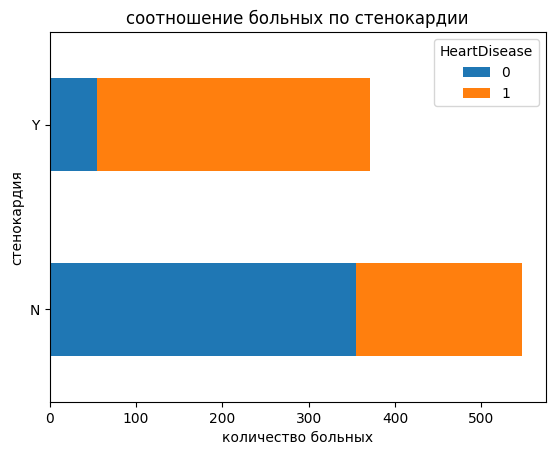

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filter = df.groupby(['ExerciseAngina','HeartDisease']).size().unstack()

plt.figure(figsize=(10, 3))
df_filter.plot(kind='barh', stacked=True)
plt.title('соотношение больных по стенокардии')
plt.xlabel('количество больных')
plt.ylabel('стенокардия')
plt.show()

<Figure size 1000x300 with 0 Axes>

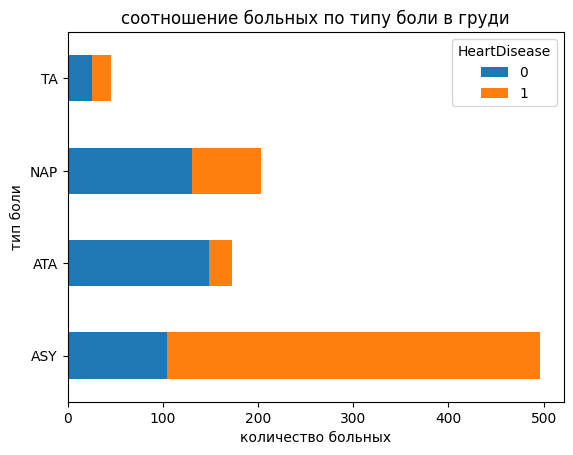

In [ ]:
df_filter = df.groupby(['ChestPainType','HeartDisease']).size().unstack()

plt.figure(figsize=(10, 3))
df_filter.plot(kind='barh', stacked=True)
plt.title('соотношение больных по типу боли в груди')
plt.xlabel('количество больных')
plt.ylabel('тип боли')
plt.show()

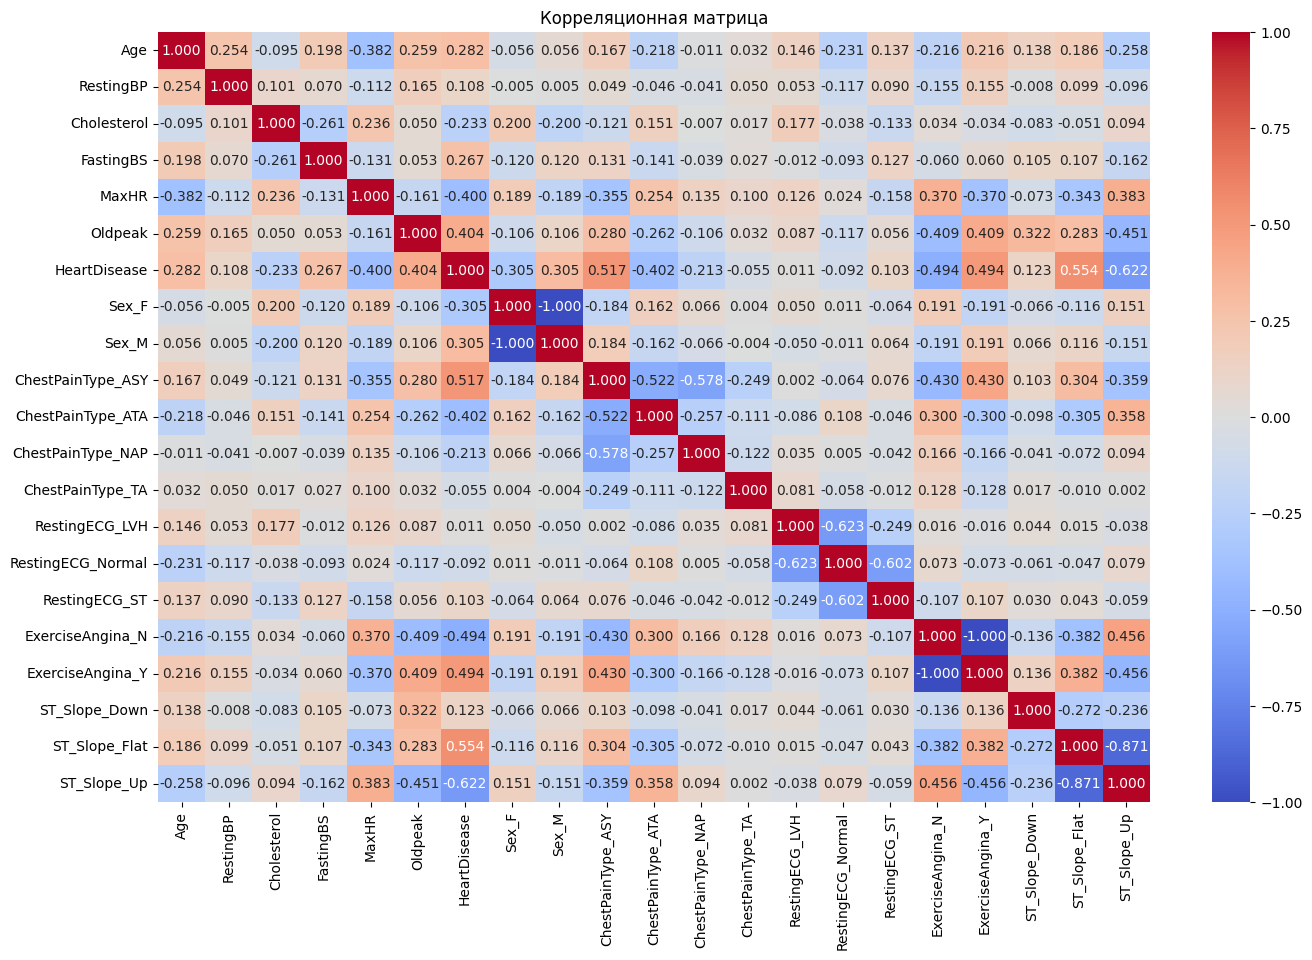

In [ ]:
df_code = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)

plt.figure(figsize=(16, 10))
sns.heatmap(df_code.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Корреляционная матрица')
plt.show()

По графикам и матрице видно, что есть сильные корреляции переменной HeartDisease с признаками:   
ST Slope UP(Flat), Chest Pain Type ASY(ATA), Oldpeak, ExerciseAngina Y(N), Sex M(F), Max HR.  
Дальше сделаем обучение и посмотрим какие все таки оказались более важными.


Обучаем дерево решений и случайный лес.

In [ ]:
#дерево решений для классификации
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x = df_code.drop(columns='HeartDisease')
y = df_code['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

tree = DecisionTreeClassifier(max_depth=5, random_state=10)

tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

target_names = df_code['HeartDisease'].unique().astype(str).tolist()

print(classification_report(y_test, y_pred, target_names = target_names ) )

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [ ]:
#случайный лес для классификации
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x2 = df_code.drop(columns='HeartDisease')
y2 = df_code['HeartDisease']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=42, test_size=0.2)

forest = RandomForestClassifier(random_state=10)

forest.fit(x2_train, y2_train)

y2_pred = forest.predict(x2_test)

target_names = df_code['HeartDisease'].unique().astype(str).tolist()

print(classification_report(y2_test, y2_pred, target_names = target_names ) )

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Наиболее важные признаки для случайного леса.

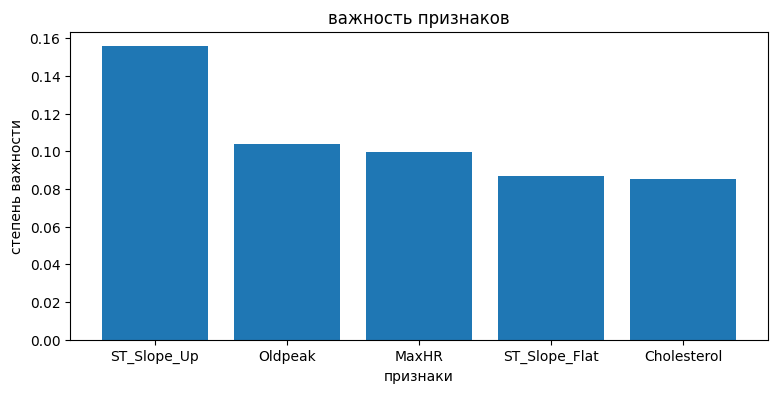

In [ ]:
imp2 = pd.Series(forest.feature_importances_)
imp2.index = pd.Series(x2_train.columns)
imp2 = imp2.sort_values(ascending=False)

plt.figure(figsize=(9, 4))
plt.title('важность признаков')
plt.xlabel('признаки')
plt.ylabel('степень важности')
plt.bar(imp2.head().index, imp2.head())
plt.show()

Бэггинг

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x3 = df_code.drop(columns='HeartDisease')
y3 = df_code['HeartDisease']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, random_state=42, test_size=0.2)

Bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=25,
                           max_samples=0.453,
                           max_features=0.85,
                           random_state=10)

Bagging.fit(x3_train, y3_train)

y3_pred = Bagging.predict(x3_test)

target_names = df_code['HeartDisease'].unique().astype(str).tolist()

print(classification_report(y_test, y3_pred, target_names = target_names ) )

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        77
           1       0.92      0.91      0.92       107

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



Стэкинг.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x4 = df_code.drop(columns='HeartDisease')
y4 = df_code['HeartDisease']

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, random_state=42, test_size=0.2)

Stacking = StackingClassifier(estimators=[
        ('SVC', LinearSVC()),
        ('RandomForest', RandomForestClassifier()),
        ('DecisionTree', DecisionTreeClassifier())
        ], final_estimator=LogisticRegression()
    )

Stacking.fit(x4_train, y4_train)

y4_pred = Stacking.predict(x4_test)

target_names = df_code['HeartDisease'].unique().astype(str).tolist()

print(classification_report(y4_test, y4_pred, target_names = target_names ) )

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



Лучший результат получился у Бэггинга, но это после манипуляций параметрами.  
Дерево решений и случайный лес дали примерно одинаковую точность, тут я тоже поманипулировал параметрами дерева.  
Стэкинг дал такую же точность что и дерево решений.  
Что касается дерева, то оно склонно к переобучению, в отличие от леса (параметрами полностью это не уберешь).  
Бэггинг дает лучшую точность за счет подгонки параметров и то, что он не особо переобучается.  
А вот у Стэкинга точность, скорее всего, зависит от того, какие модели в него переданы. И еще я визуально заметил, что Стэкинг дольше обучается. Вообще я бы предпочел смотреть насколько та или иная модель нагружает сервер, и сопоставлять это с полученной точностью.  